# API Demo
This notebook demonstrates usage of the craterfind API using a minimal python app. The first cell contains the code that will do the necessary things.

In [1]:
import json
import subprocess

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from matplotlib.patches import Circle

def load_image(path='./data/0.png'):
    img = (imread(path)*255).astype(np.uint8)
    return img

def prepare_image(img):
    img = img.flatten()
    return img

def prepare_request(array):
    base_url = "http://localhost:8501/v1/models/craters:predict"
    data = {
        "instances":[array.tolist()]
    }
    data_json = json.dumps(data)
    formatted = f"curl -d '{data_json}' -X POST {base_url}"
    return formatted

def make_request(request_string):
    response = subprocess.check_output(request_string, shell=True).decode()
    response_data = eval(response)
    return response_data
    

def plot_prediction(img, prediction):
    x,y,r = prediction
    fig, ax = plt.subplots(1)
    prediction = Circle(xy=(x,y), radius=r, fill=False)
    ax.add_artist(prediction)
    ax.imshow(img, cmap='Greys_r')

# Start with an Image
The model only takes pixels as an input. The annotator-provided crater location is implied to be in the center of the input image. This POC just deals with images of 32x32 pixels, like the following:

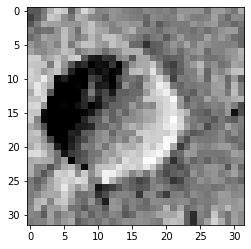

In [2]:
#randomly select an image from test data
n = np.random.randint(300)
#load image and convert to integer pixel values
img = load_image(f'./data/{n}.png')
plt.imshow(img, cmap='Greys_r');

# Transform Pixels
The raw pixel data needs to be flattened into a single vector.

In [3]:
#this function does the transformation
array = prepare_image(img)

#inspect resulting data:
print("Shape of image data: ", array.shape)

Shape of image data:  (1024,)


# Form Request
The API can be hit with a POST request and json body. The curl format would be:

`curl -d '{"instances":[[pixels]]}' -X POST http://localhost:<ip>/v1/models/craters:predict`

This is done here:

In [4]:
curl_request = prepare_request(array)
#see what it looks like:
print(curl_request)

curl -d '{"instances": [[71, 69, 101, 149, 185, 171, 77, 134, 189, 154, 111, 114, 126, 121, 110, 103, 100, 115, 112, 106, 112, 99, 125, 125, 126, 125, 97, 132, 134, 115, 99, 144, 51, 75, 108, 174, 160, 122, 100, 151, 143, 114, 110, 93, 125, 117, 114, 107, 104, 86, 117, 112, 104, 108, 136, 122, 107, 104, 111, 136, 108, 88, 117, 114, 69, 103, 144, 137, 136, 126, 129, 125, 144, 166, 133, 122, 110, 127, 132, 125, 126, 81, 111, 73, 95, 104, 104, 104, 127, 114, 127, 132, 101, 103, 85, 100, 108, 86, 97, 93, 123, 159, 132, 93, 148, 163, 141, 137, 110, 112, 134, 148, 112, 112, 104, 90, 110, 115, 101, 104, 93, 108, 92, 107, 123, 134, 132, 90, 90, 106, 140, 130, 127, 162, 130, 103, 121, 154, 132, 163, 165, 147, 123, 112, 100, 78, 100, 107, 74, 104, 132, 106, 101, 104, 136, 112, 130, 114, 93, 88, 127, 108, 119, 133, 112, 159, 103, 141, 166, 163, 136, 127, 165, 148, 154, 89, 85, 41, 75, 80, 103, 127, 112, 140, 108, 132, 121, 112, 110, 107, 111, 86, 138, 121, 115, 130, 137, 162, 151, 101, 122, 133, 

# Send Request, Parse Response

In [5]:
response = make_request(curl_request)
#response contains x, y, and r predictions for crater.
print(response)

{'predictions': [[12.3267813, 15.5509958, 9.61919689]]}


# Plot Prediction

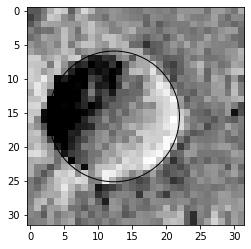

In [6]:
prediction = response['predictions'][0]
plot_prediction(img, prediction)